# Modelo de regresión lineal para la predicción de la duración de los quirófanos.
 ## Análisis del rendimiento del modelo de regresión lineal.
 
 ### Trabajo de Fin de Grado - Universidad de Burgos
 #### Jesús García Armario

In [12]:
# Imports necesarios
import numpy as np
from linearReg import LinearReg
import pandas as pd

In [13]:
# Leemos el listado preprocesado de datos
data = pd.read_excel('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_Codificado.xlsx')

In [14]:
# Separamos los datos en X e Y
# Y será la columna de duración de la intervención
# X será el resto de columnas
X = data.drop(['DURACIÓN'], axis=1)
Y = data['DURACIÓN']

In [15]:
# Usamos un método de GridSearch para encontrar los mejores parámetros para el modelo
# de regresión lineal
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# Definimos los parámetros que queremos probar
parameters = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False],'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Creamos el objeto GridSearchCV
reg = GridSearchCV(LinearRegression(), parameters, cv=5)
# Entrenamos el modelo
reg.fit(X, Y)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'normalize': [True, False]})

In [16]:
# Entrenamos el modelo con los parámetros encontrados
model = LinearReg(data=X, target=Y, n_jobs=reg.best_params_['n_jobs'], fit_intercept=reg.best_params_['fit_intercept'], copy_X=reg.best_params_['copy_X'], test_size=0.2, random_state=42)

In [17]:
# Mostramos los resultados
print('MSE: ', model.getMSE())
print('R2: ', model.getR2())
print('Cross Validation MSE: ', model.getCrossValMSE())
print('Cross Validation R2: ', model.getCrossValR2())
print('Cross Validation RMSE: ', model.getCrossValRMSE())

MSE:  184860890.4104718
R2:  -0.0004368904279083985
Cross Validation MSE:  55708172.97067258
Cross Validation R2:  -0.0006940798030707906
Cross Validation RMSE:  7463.7907909233745


ValueError: x and y must be the same size

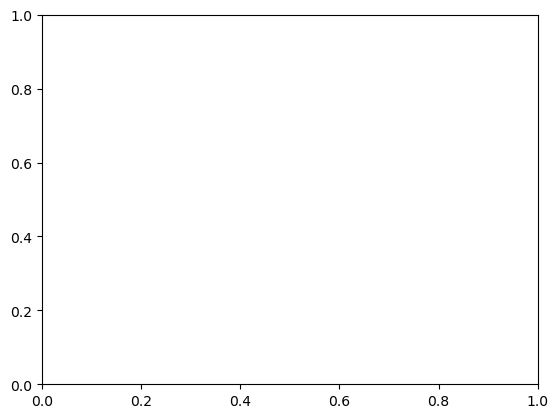

In [18]:
# Representamos gráficamente los resultados
import matplotlib.pyplot as plt
plt.scatter(model.getCrossValPred(), model.getCrossVal(), color='black')
plt.plot(model.getCrossValPred(), model.getCrossValPred(), color='blue', linewidth=3)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

In [9]:
# Cargamos los datos del dataset ampliado
data = pd.read_excel('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_PLASTICA_Codificado.xlsx')

In [10]:
X = data.drop(['DURACIÓN'], axis=1)
Y = data['DURACIÓN']

In [11]:
parameters = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False],'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Creamos el objeto GridSearchCV
reg = GridSearchCV(LinearRegression(), parameters, cv=5)
# Entrenamos el modelo
reg.fit(X, Y)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

ValueError: could not convert string to float: 'V51.0'